In [ ]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
% matplotlib inline

# import warnings
# warnings.filterwarnings("ignore")

In [ ]:
data = pd.read_csv("/content/ratings_and_sentiments.csv",header= 0, encoding= 'unicode_escape')
data.head(3)
len(data)

7621

In [ ]:
data = data.dropna()
data[["coffee_shop_name","review_text", "num_rating"]]

,coffee_shop_name,review_text,num_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the vib...,5.0
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, vibe ...",4.0
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in food seating ...,4.0
3,The Factory - Cafe With a Soul,11/25/2016 Very cool vibe! Good drinks Nice s...,2.0
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are location within...,4.0
...,...,...,...
4502,Friends & Neighbors,4/19/2015 I love this little gem on the east ...,5.0
4503,Friends & Neighbors,8/23/2014 1 check-in Um...so this place rocks...,5.0
4504,Friends & Neighbors,8/20/2015 This is a pretty awesome place. Pre...,5.0
4505,Friends & Neighbors,10/8/2015 I think this place lives up to its ...,5.0


In [ ]:
coffee = data.groupby("coffee_shop_name")
coffee.describe()

num_rating            ... local_sent     
                                          count      mean  ...        75%  max
coffee_shop_name                                           ...                
Anderson's Coffee Company                 100.0  4.620000  ...        0.0  3.0
Apanas Coffee & Beer                      136.0  4.580882  ...        0.0  3.0
Arturo's Underground Cafe                 100.0  4.300000  ...        0.0  2.0
Bennu Coffee                              100.0  4.130000  ...        0.0  1.0
Brian's Brew                               45.0  4.844444  ...        0.0  1.0
Cafe CrÃ¨me                               100.0  4.370000  ...        0.0  2.0
Caffe Medici                              243.0  4.119342  ...        0.0  2.0
Cenote                                    100.0  4.040000  ...        0.0  0.0
Cherrywood Coffeehouse                    100.0  3.960000  ...        0.0  2.0
Corona Coffee                             100.0  4.530000  ...        0.0  2.0
Cream Whiskers                            100.0  3.930000  ...        0.0  0.0
Dolce Neve                                100.0  4.640000  ...        0.0  3.0
Epoch Coffee                              300.0  3.830000  ...        0.0  2.0
Fat Cats Organic Coffee And Dessert        94.0  4.361702  ...        0.0  3.0
Figure 8 Coffee Purveyors                 100.0  4.500000  ...        0.0  2.0
Flat Track Coffee                          63.0  4.571429  ...        0.0  3.0
Fleet Coffee                               57.0  4.701754  ...        0.0  0.0
Flightpath Coffeehouse                    100.0  4.230000  ...        0.0  1.0
Flitch Coffee                              28.0  4.821429  ...        0.0  0.0
Friends & Neighbors                        15.0  4.800000  ...        0.0  0.0
Halcyon                                   200.0  3.820000  ...        0.0  0.0
Holy Grounds                               30.0  4.633333  ...        0.0  1.0
Houndstooth Coffee                        200.0  4.175000  ...        0.0  2.0
Irie Bean Coffee Bar                      100.0  4.300000  ...        0.0  2.0
Jo's Coffee                               100.0  4.190000  ...        0.0  2.0
Legend Coffee                              28.0  4.714286  ...        0.0  1.0
Lola Savannah Coffee Lounge               100.0  4.110000  ...        0.0  3.0
Lucky Lab Coffee                           25.0  4.440000  ...        0.0  0.0
Mary's Cafe                               100.0  4.360000  ...        0.0  3.0
MaÃ±ana Coffee & Juice                     33.0  4.848485  ...        0.0  0.0
Monkey Nest Coffee                        100.0  4.080000  ...        0.0  2.0
Mozart's Coffee Roasters                  100.0  4.070000  ...        0.0  2.0
Patika                                    100.0  4.350000  ...        0.0  2.0
Sa-Ten                                    100.0  4.350000  ...        0.0  0.0
Seventh Flag Coffee Co                    100.0  4.340000  ...        0.0  1.0
Summer Moon Coffee Bar                    100.0  4.090000  ...        0.0  1.0
Summermoon Coffee Bar                     100.0  4.530000  ...        0.0  2.0
Tea Haus                                  100.0  4.110000  ...        0.0  2.0
The Factory - Cafe With a Soul            244.0  4.360656  ...        0.0  0.0
The Hideout Coffeehouse                   100.0  3.910000  ...        0.0  2.0
The Marvelous Vintage Tea Party Co.        10.0  5.000000  ...        0.0  0.0
Third Coast Coffee Roasting Company        56.0  4.821429  ...        0.0  2.0
Thunderbird Coffee                        100.0  3.970000  ...        0.0  1.0
Venezia Italian Gelato                    100.0  4.810000  ...        0.0  2.0
Vintage Heart Coffee                      100.0  4.170000  ...        0.0  3.0

[45 rows x 96 columns]

In [ ]:
coffee.mean().sort_values(by="num_rating", ascending=False).head(3)

,num_rating,bool_HIGH,overall_sent,tea_sent,service_sent,seating_sent,price_sent,location_sent,alcohol_sent,hours_sent,internet_sent,local_sent
coffee_shop_name,,,,,,,,,,,,
The Marvelous Vintage Tea Party Co.,5.000000,1.000000,2.100000,0.500000,0.500000,0.000000,0.000000,0.000000,0.2,0.000000,0.0,0.000000
MaÃ±ana Coffee & Juice,4.848485,0.939394,1.424242,0.030303,0.272727,0.212121,-0.060606,0.121212,0.0,0.060606,0.0,-0.030303
Brian's Brew,4.844444,1.000000,1.200000,0.000000,0.222222,0.022222,0.000000,0.022222,0.0,0.000000,0.0,0.022222


In [ ]:
?WordCloud

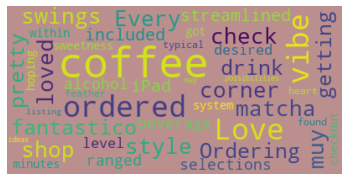

In [ ]:
text = data.review_text[0]
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="rosybrown").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

There are 2554031 words in the combination of all review.


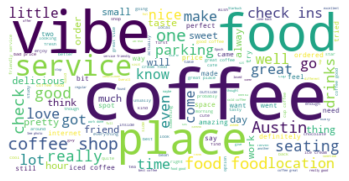

In [ ]:
text = " ".join(review for review in data.review_text)
print ("There are {} words in the combination of all review.".format(len(text)))

# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["drink", "now", "coffe", "flavor", "flavors"])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
coffee_mask = np.array(Image.open("s.png"))
coffee_mask = coffee_mask.reshape((coffee_mask.shape[0],-1), order='F')
coffee_mask

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [ ]:
def transform_format(val):
    if val == 0:
        return 255
    else:
        return val

In [ ]:
# Transform your mask into a new one that will work with the function:
transformed_coffee_mask = np.ndarray((coffee_mask.shape[0],coffee_mask.shape[1]), np.int32)

for i in range(len(coffee_mask)):
    transformed_coffee_mask[i] = list(map(transform_format, coffee_mask[i]))

In [ ]:
transformed_coffee_mask

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=int32)

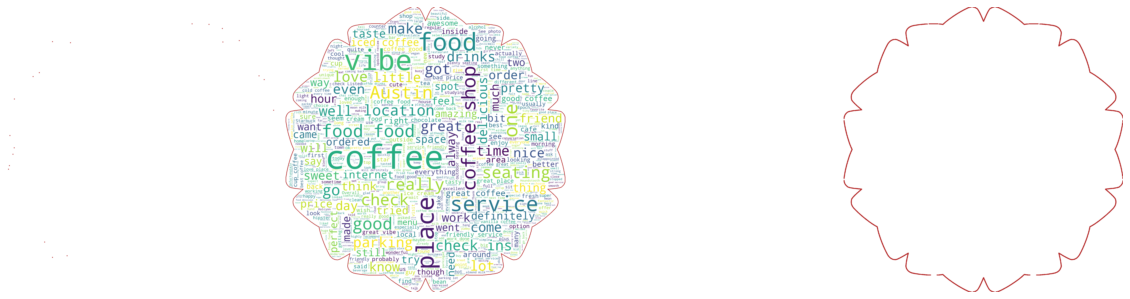

In [ ]:
# Create a word cloud image
wc = WordCloud(background_color="white", max_words=1000, mask=transformed_coffee_mask,
               stopwords=stopwords, contour_width=3, contour_color='firebrick')

# Generate a wordcloud
wc.generate(text)

# store to file
wc.to_file("cloud-png.png")

# show
plt.figure(figsize=[20,10])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
coffee.size().sort_values(ascending=False).head(10)

coffee_shop_name
Epoch Coffee                       300
The Factory - Cafe With a Soul     244
Caffe Medici                       243
Houndstooth Coffee                 200
Halcyon                            200
Apanas Coffee & Beer               136
Cream Whiskers                     100
Venezia Italian Gelato             100
Flightpath Coffeehouse             100
Figure 8 Coffee Purveyors          100
dtype: int64

In [ ]:
a = " ".join(review for review in data["Epoch Coffee"].review_text)
b = " ".join(review for review in data[data["coffee_shop_name"]=="The Factory - Cafe With a Soul"].review_text)
c = " ".join(review for review in data[data["coffee_shop_name"]=="Caffe Medici"].review_text)
d = " ".join(review for review in data[data["coffee_shop_name"]=="Cream Whiskers"].review_text)
e = " ".join(review for review in data[data["coffee_shop_name"]=="Apanas Coffee & Beer"].review_text)

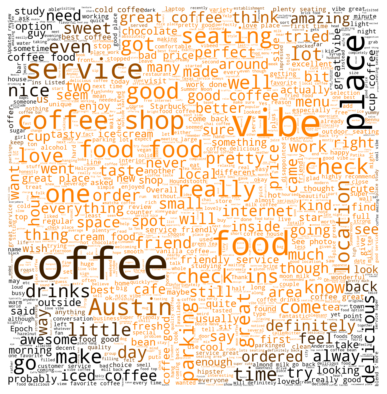

In [ ]:
# Generate a word cloud image
mask = np.array(Image.open("s.png"))
wordcloud_txt = WordCloud(stopwords=stopwords, background_color="white", mode="RGBA", max_words=1000, mask=mask).generate(text)

# create coloring from image
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[7,7])
plt.imshow(wordcloud_txt.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")

# store to file
plt.savefig("new_cupcake.png", format="png")

plt.show()